Modified landmarks for crying expression:
 [[185.16409 130.63867]
 [185.25851 130.89511]
 [185.35641 131.15027]
 ...
 [309.02771 189.22159]
 [308.81503 188.93262]
 [308.60388 188.6434 ]]
Transformation matrix:
 [[ 1.00000000e+00 -2.53372540e-14  1.93512711e-11]
 [-1.65020557e+01 -2.75263562e+00  3.64363600e+03]]
Warped image shape: (1536, 2048, 3)


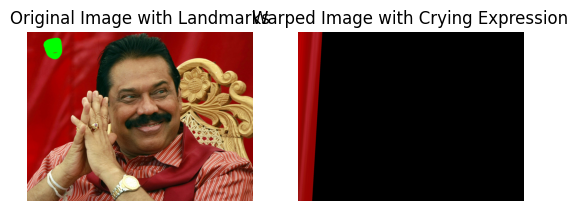

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def create_crying_expression(landmarks):
    # Adjust mouth corners downwards for a more pronounced sad expression
    landmarks[48, 1] += 10  # Left corner of the mouth down
    landmarks[54, 1] += 10  # Right corner of the mouth down
    
    # Raise eyebrows more significantly for a sad look
    landmarks[21, 1] -= 10  # Left eyebrow
    landmarks[22, 1] -= 10  # Right eyebrow
    
    # Print modified landmarks for verification
    print("Modified landmarks for crying expression:\n", landmarks)
    
    return landmarks

def get_transformation_matrix(src_points, dst_points):
    # Choose three appropriate landmarks for the transformation
    selected_src = np.array([src_points[48], src_points[54], src_points[36]])  # Mouth corners and left eye
    selected_dst = np.array([dst_points[48], dst_points[54], dst_points[36]])  # Same for modified landmarks
    transform_matrix = cv2.getAffineTransform(selected_src.astype(np.float32), selected_dst.astype(np.float32))
    print("Transformation matrix:\n", transform_matrix)
    return transform_matrix

def warp_image(image, transform_matrix, size):
    warped_image = cv2.warpAffine(image, transform_matrix, size)
    return warped_image

def draw_landmarks(image, landmarks, color=(0, 255, 0), radius=3):
    for (x, y) in landmarks:
        cv2.circle(image, (int(x), int(y)), radius, color, -1)
    return image

# Load your image here
img1 = cv2.imread('R.jpeg')  # Replace with the path to your image
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)  # Convert to RGB for visualization

# Load landmarks from the text file
vertices = np.loadtxt('ver_lst_output.txt', delimiter=',', skiprows=1)  # Ensure this matches your actual file format

# Transpose the vertices to get (N, 2) format for landmarks
landmarks_2d = vertices[:2, :].T  # Taking the first two rows (x and y) and transposing

# Ensure the correct indices for mouth corners and eyebrows
# (Make sure that indices 48, 54, 21, 22 correspond correctly to your landmarks)
# If your array is structured differently, adjust these indices accordingly

# Apply the crying expression manipulation
crying_landmarks = create_crying_expression(landmarks_2d.copy())

# Get transformation matrix
transform_matrix = get_transformation_matrix(landmarks_2d.copy(), crying_landmarks.copy())

# Warp the original image using the transformation matrix
warped_image = warp_image(img1, transform_matrix, (img1.shape[1], img1.shape[0]))

# Check if the warped image is valid
if warped_image is None:
    print("Error: Warped image is None. Check the transformation matrix.")
else:
    print("Warped image shape:", warped_image.shape)

    # Visualize the original landmarks
    img_with_landmarks = draw_landmarks(img1.copy(), landmarks_2d)
    plt.subplot(1, 2, 1)
    plt.imshow(img_with_landmarks)
    plt.title('Original Image with Landmarks')
    plt.axis('off')

    # Visualize the warped image
    plt.subplot(1, 2, 2)
    plt.imshow(warped_image)
    plt.title('Warped Image with Crying Expression')
    plt.axis('off')

    plt.show()


Modified landmarks for subtle sad expression:
 [[185.16409 130.63867]
 [185.25851 130.89511]
 [185.35641 131.15027]
 ...
 [309.02771 189.22159]
 [308.81503 188.93262]
 [308.60388 188.6434 ]]
Transformation matrix:
 [[ 1.00000000e+00 -2.53372540e-14  1.93512711e-11]
 [-8.25102783e+00 -8.76317812e-01  1.82181800e+03]]
Warped image shape: (1536, 2048, 3)


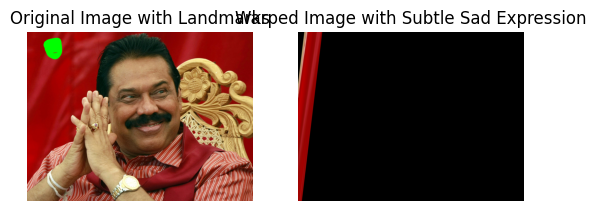

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def create_subtle_expression(landmarks):
    # Adjust mouth corners downwards slightly for a more subtle sad expression
    landmarks[48, 1] += 5  # Left corner of the mouth down
    landmarks[54, 1] += 5  # Right corner of the mouth down
    
    # Raise eyebrows slightly for a sad look
    landmarks[21, 1] -= 5  # Left eyebrow
    landmarks[22, 1] -= 5  # Right eyebrow
    
    # Print modified landmarks for verification
    print("Modified landmarks for subtle sad expression:\n", landmarks)
    
    return landmarks

def get_transformation_matrix(src_points, dst_points):
    # Choose three appropriate landmarks for the transformation
    selected_src = np.array([src_points[48], src_points[54], src_points[36]])  # Mouth corners and left eye
    selected_dst = np.array([dst_points[48], dst_points[54], dst_points[36]])  # Same for modified landmarks
    transform_matrix = cv2.getAffineTransform(selected_src.astype(np.float32), selected_dst.astype(np.float32))
    print("Transformation matrix:\n", transform_matrix)
    return transform_matrix

def warp_image(image, transform_matrix, size):
    warped_image = cv2.warpAffine(image, transform_matrix, size)
    return warped_image

def draw_landmarks(image, landmarks, color=(0, 255, 0), radius=3):
    for (x, y) in landmarks:
        cv2.circle(image, (int(x), int(y)), radius, color, -1)
    return image

# Load your image here
img1 = cv2.imread('R.jpeg')  # Replace with the path to your image
if img1 is None:
    print("Error: Image not found. Please check the path.")
else:
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)  # Convert to RGB for visualization

    # Load landmarks from the text file
    vertices = np.loadtxt('ver_lst_output.txt', delimiter=',', skiprows=1)  # Ensure this matches your actual file format


    # Transpose the vertices to get (N, 2) format for landmarks
    landmarks_2d = vertices[:2, :].T  # Taking the first two rows (x and y) and transposing

    # Check if landmarks are valid
    if landmarks_2d.shape[0] < 55:  # Make sure there are enough landmarks
        print("Error: Not enough landmarks for manipulation.")
    else:
        # Apply the subtle expression manipulation
        subtle_landmarks = create_subtle_expression(landmarks_2d.copy())

        # Get transformation matrix
        transform_matrix = get_transformation_matrix(landmarks_2d.copy(), subtle_landmarks.copy())

        # Warp the original image using the transformation matrix
        warped_image = warp_image(img1, transform_matrix, (img1.shape[1], img1.shape[0]))

        # Check if the warped image is valid
        if warped_image is None or np.all(warped_image == 0):
            print("Error: Warped image is None or entirely black. Check the transformation matrix.")
        else:
            print("Warped image shape:", warped_image.shape)

            # Visualize the original landmarks
            img_with_landmarks = draw_landmarks(img1.copy(), landmarks_2d)
            plt.subplot(1, 2, 1)
            plt.imshow(img_with_landmarks)
            plt.title('Original Image with Landmarks')
            plt.axis('off')

            # Visualize the warped image
            plt.subplot(1, 2, 2)
            plt.imshow(warped_image)
            plt.title('Warped Image with Subtle Sad Expression')
            plt.axis('off')

            plt.show()


In [17]:
vertices

array([[185.16409, 185.25851, 185.35641, ..., 309.02771, 308.81503,
        308.60388],
       [130.63867, 130.89511, 131.15027, ..., 189.22159, 188.93262,
        188.6434 ],
       [ 88.62933,  88.62528,  88.61917, ...,   6.24152,   5.51089,
          4.78004]])

In [18]:
landmarks_2d

array([[185.16409, 130.63867],
       [185.25851, 130.89511],
       [185.35641, 131.15027],
       ...,
       [309.02771, 189.22159],
       [308.81503, 188.93262],
       [308.60388, 188.6434 ]])

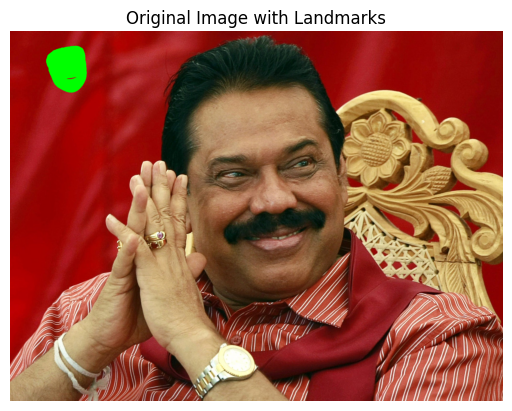

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def draw_landmarks(image, landmarks, color=(0, 255, 0), radius=3):
    """Draws landmarks on the image."""
    for (x, y) in landmarks:
        cv2.circle(image, (int(x), int(y)), radius, color, -1)
    return image

# Load your image here
img1 = cv2.imread('R.jpeg')  # Replace with the path to your image
if img1 is None:
    print("Error: Image not found. Please check the path.")
else:
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)  # Convert to RGB for visualization

    # Load landmarks from the text file
    vertices = np.loadtxt('ver_lst_output.txt', delimiter=',', skiprows=1)  # Ensure this matches your actual file format

    # Transpose the vertices to get (N, 2) format for landmarks
    landmarks_2d = vertices[:2, :].T  # Taking the first two rows (x and y) and transposing

    # Check if landmarks are valid
    if landmarks_2d.shape[0] < 55:  # Make sure there are enough landmarks
        print("Error: Not enough landmarks for manipulation.")
    else:
        # Visualize the original landmarks on the image
        img_with_landmarks = draw_landmarks(img1.copy(), landmarks_2d)

        # Plot the image with landmarks
        plt.imshow(img_with_landmarks)
        plt.title('Original Image with Landmarks')
        plt.axis('off')
        plt.show()


In [3]:
pip install tensorflow_datasets

  Using cached tensorflow_datasets-4.9.7-py3-none-any.whl.metadata (9.6 kB)
  Using cached immutabledict-4.2.0-py3-none-any.whl.metadata (3.4 kB)
  Using cached promise-2.3.tar.gz (19 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  ERROR: Error [WinError 225] Operation did not complete successfully because the file contains a virus or potentially unwanted software while executing command python setup.py egg_info
ERROR: Could not install packages due to an OSError: [WinError 225] Operation did not complete successfully because the file contains a virus or potentially unwanted software


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import tensorflow
import numpy as np
import tensorflow_datasets as tfds
import yaml
import os
import cv2
import matplotlib.pyplot as plt
from skimage import io
from scipy.spatial import distance as dist

# Load the AFLW2K3D dataset
dataset, info = tfds.load('aflw2k3d', split='train', with_info=True)

ModuleNotFoundError: No module named 'tensorflow_datasets'

In [8]:
import numpy as np
import yaml
import os
import cv2
import matplotlib.pyplot as plt
from skimage import io
from scipy.spatial import distance as dist


import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Define the local path to the downloaded dataset
local_dataset_path = 'AFLW2000-3D'

# Function to load images and landmarks from local directory
def load_aflw2k3d_dataset(local_path):
    images = []
    landmarks = []
    


In [9]:
load_aflw2k3d_dataset('AFLW2000-3D')

NameError: name 'landmarks' is not defined